<div style="text-align: justify">
These are the lecture notes for CSC349A Numerical Analysis prepared by
Rich Little and George Tzanetakis. They roughly correspond to
the material covered in each lecture in the classroom but the actual
classroom presentation might deviate significantly from them depending
on the flow of the course delivery. They are provided as a reference to
the instructor as well as supporting material for students who miss
the lectures. They are simply notes to support the lecture so the text
is not detailed and they are not thoroughly checked. Use at your own
risk.
</div>

# 1 Programming in MATLAB
<div style="text-align: justify">
The numerical approach to solving the differetial equation of the
falling parachutist is straightforward but requires a lot of repeated
tedious calculation especially for smaller step sizes. This is the
perfect job for a computer to do and we will be learning how to do
this using high level programming environments for numerical
computations.  We will be focusing on MATLAB which is a
commercial software package. I strongly encourage
you to try out the little program examples on your own and
experiment. The best (and probably the only) way to become a good
programmer is through a lot of practice directly on a computer. 
</div>

<div style="text-align: justify">
MATLAB is based on an interpreter meaning that the user can type
in a statement, press enter and then immediately see the result of
that statement. This is in contrast to compilers that need to have the
full source code of a program and then translate it to a binary that
can be used to run the code.  It is typical to write MATLAB code
incrementally and the software provides a prompt every time a
statement is executed. For example you can type the following in the
command window of matlab to obtain the square root of 2:
</div>

```matlab
sqrt(2) 

ans = 
     1.4142
```


It is straightforward to perform simple calculations, and use variable
names for storing numbers. For example: 

```matlab
>> 5 + 3 

ans =

     8

>> a = 5; 
>> a + 3
ans =

     8
>> b = a + 3 
b = 
     8
```

<div style="text-align: justify">
Notice that in MATLAB ending a statement with a semi-colon makes it
''silent'' meaning there is no output whereas leaving out the
semi-colon results in showing the result of that statement. We can now
write an expression to evaluate the analytical solution to the falling
parachutist problem. Recall that the analytical solution from
differential calculus was: 
$$v(t) = \frac{gm}{c} (1 - e^{-\frac{ct}{m}})\tag{1}
$$
</div>

<div style="text-align: justify">

So for example if we want to compute the value at $t=4 sec$, with
a mass of $68.1 kg$ with a drag coefficient of $12.5 kg/sec$ and a
gravity constant g = 9.8 we can use MATLAB to do so as follows: 
</div>

```matlab
>> g = 9.81;
>> m = 68.1;
>> c = 12.5;
>> t = 4; 
>> v = (g * m / c) * (1 - exp(-(c * t/m)))
v = 27.7976 
```

<div style="text-align: justify">
It is educational to consider how the same computation would be
performed with a classic calculator that only supports binary and
unary operations. You would have to perform several intermediate
calculations and combine the results to achieve the effect that the
single line that calculates the velocity in MATLAB does. MATLAB, or
more generally the compiler or interpreter used, translates this high
level expression automatically into the appropriate sequence of
machine instructions that similarly to a calculator are either binary
or unary operators.
</div>

<div style="text-align: justify">
If we wanted to let's say compute the velocity at $t = 6$ seconds we
could change $t$ to be $6$ and then retype the expression corresponding
to the analytical solution. This is tedious, time consuming and
practically impossible if we wanted to compute this for many values of
$t$. In the command-line window, it is possible to cycle through the
previous commands using the ${\bf Up}$ and ${\bf Down}$ arrow keys but
that only saves a little bit of typing. 
</div>

```matlab
>> t = 6; 
>> v = (g * m / c) * (1 - exp(-(c * t/m)))

v = 

     35.6781 
```

<div style="text-align: justify">
A fundamental abstraction in
computer programming is the concept of a function or procedure that
takes some input arguments, performs some computation using them and
returns the result. In MATLAB functions are defined in
separate files ending with the extension .m. Any text editor can be
used to create these files which need to be named with the same name
as the defined function. In MATLAB there is a built-in editor window
that can be used. We can define a function that abstracts the
analytical solution to the velocity problem. In honor of a 
recent movie that is somewhat related to our problem we will name 
our function ${\it skyfall}$ and define it in a file named ${\it skyfall.m}$ 
the contents of which are: 
</div>

```matlab
function [v] = skyfall(g, m, c, t)
    v = (g * m / c) * (1 - exp(-c * t / m));
end
```

<div style="text-align: justify">
As you can see from the source code, the function is named skyfall and
takes as arguments the parameters $g,m,c,t$ and returns the value
$v$. We can now call this function from the command window (assuming
that the file skyfall.m is in the current directory or a directlory in
the MATLAB path).

</div>

<div style="text-align: justify">
As you can see from the source code, the function is named skyfall and
takes as arguments the parameters $g,m,c,t$ and returns the value
$v$. We can now call this function from the command window (assuming
that the file skyfall.m is in the current directory or a directlory in
the MATLAB path).

</div>

```matlab
>> skyfall(g,m,c,4)
ans = 27.7976
>> skyfall(g,m,c,6)
ans = 35.6781
>> skyfall(g,m,c,20)
ans = 52.0848
```

<div style="text-align: justify">
Computer programs need to be correct and perform what they are
supposed to do from the computer perspective. They also need to be
readable and understandable by other programmers as most programming
is done in teams. Comments are lines that start with special
characters (in MATLAB $\%$) that are completely ignored by the
compiler but are used to provide information that can help other
programmers understand your code. Here is the ${\it skyfall}$ function 
with added comments: 
</div>

```matlab
% returns the velocity of a free falling parachutists 
% based on the analytical solution described in our course notes 
% g is the gravity constant 
% m is the mass of 007 
% c is the drag coefficient caused by his expensive outfit 
% t is the time in seconds 
function [v] = skyfall(g,m,c,t)
        v= (g * m / c) * (1 - exp(- c * t / m));
end

```


<div style="text-align: justify">
We can see that we are calling the ${\it skyfall}$
function several times with different arguments that progress regularly. Loop
constructs provide a structured way of expressing repetition in
programming languages. In MATLAB there is a special syntax
for creating sequences of numbers that works as follows:
</div>

```matlab
>> t = 1:10
t =

    1    2    3    4    5    6    7    8    9   10
>> t = 1:2:10
t =

    1    3    5    7    9
>> t = 1:0.5:10 
t =

 Columns 1 through 7:

     1.0000     1.5000     2.0000     2.5000     3.0000     3.5000     4.0000

 Columns 8 through 14:

     4.5000     5.0000     5.5000     6.0000     6.5000     7.0000     7.5000

 Columns 15 through 19:

     8.0000     8.5000     9.0000     9.5000    10.0000
     
```

<div style="text-align: justify">
As is evident from the example the syntax is ${\it
  start:step:end}$. Until this example the code examples have been
simple enough that they can easily be translated in any programming
language. This syntax is more specific to MATLAB and is based on the
fact that MATLAB has very strong support for matrices. The results
that you see are essentially row vectors or matrices of dimension 1 by
10 for the first case. There is special syntax for creating matrices and 
accessing their elements which should be evident from the following examples. 
</div>

```matlab
>> x = [1, 2, 3]; % a row vector 
>> x 
x =

   1   2   3
x = [1; 2; 3]; % a column vector 
>> x 
x =

   1
   2
   3
>> x = [1,2; 3,4; 5,6] % a 3 by 2 matrix  
x =

   1   2
   3   4
   5   6
>> x(1,2)     % accessing a single element at position 1,2  
ans = 2 
>> x(2,1) 
ans = 3
>> x(:,1)      % the first column 
ans =

   1
   3
   5
>> x(1,:)      % the first row 
ans =

   1   2
```

<div style="text-align: justify">
We can now write a loop to iterate over values of t and compute the
associated velocities using the function {\it skyfall} we defined.
</div>

```matlab
>> g = 9.81;
>> m = 68.1;
>> c = 12.5;
>> for t = 0:2:12; 
>      skyfall(g,m,c,t) 
> end
ans = 0
ans =  16.4217
ans =  27.7976
ans =  35.6781
ans =  41.1372
ans =  44.9189
ans =  47.5387

```

<div style="text-align: justify">
Now instead of having to retype the function call several times we can
easily express different iterations. For example by changing $t =
0:2:12$ to $t = 0:1:12$ we can compute the velocity at every second
instead of every two seconds. This version relies on the missing
semicolon when calling skyfall in order to output the answer.  It
would be nice to have all the velocities in a vector so that we could
do further operations with them, perhaps average them or plot them. We can easily modify our code to achieve this. 
</div>

```matlab
>> g = 9.81;
>> m = 68.1;
>> c = 12.5;
>> velocities = zeros(1,11); % create vector of velocities 
>> times = zeros(1, 11); % create vector of times 
>> for t = 0:1:10; 
>      velocities(t+1) = skyfall(g,m,c,t); 
>      times(t+1) = t;
> end
>> velocities
velocities =

 Columns 1 through 7:

    0.00000    8.95318   16.40498   22.60717   27.76929   32.06577   35.64175

 Columns 8 through 11:

   38.61807   41.09528   43.15708   44.87314
>> plot(times, velocities);      % plot the velocities against time 
>> xlabel('time in seconds');    % add labels  
>> ylabel('velocity in meters/second');
```

<div style="text-align: justify">
One important difference between MATLAB and many other
programming languages is that the indexing of vectors and arrays is
done starting with 1 rather than 0. That is why we have $t+1$ in the
line assigning to the current return value of ${\it skyfall}$ to the
corresponding entry of the row vector of velocities. In general this
is always a tricky part especially when porting MATLAB code to C/C++
or vice versa and one has to be careful. Another possibility is to 
encapsulate the iteration in the function itself. Here is a version 
of ${\it skyfall.m}$ that does that. 

</div>

```matlab
% returns the velocities of a free falling parachutists
% based on the analytical solution described in our course notes
% g is the gravity constant
% m is the mass of 007
% c is the drag coefficient caused by his expensive outfit
% t0 is the starting time
% tn is the ending time
% h is the time step size

function [times, velocities] = skyfall_with_loop(g,m,c,t0,h,tn)
        n = (tn - t0) / h;
        times = zeros(1,n);
        velocities = zeros(1,n);
        i = 1;                       % iteration
        for t=t0:h:tn;
                times(i) = t;
                velocities(i) = (g * m / c) * (1 - exp(- c * t / m));
                i = i+1;
        end
endfunction
```

<div style="text-align: justify">
Notice the use of a separate variable $i$ which counts iterations so
that the velocity vector gets filled by one value at a time
independently of the step size. What would happen if $i$ was replaced
by $t$ ?  If you can't figure it out, try it out and see what happens
? Can you explain it ? What about if $i$ is replaced by $t+1$ would
that work ? If not is there a particular step size for which it would
?
</div>

<div style="text-align: justify">
Now, you may have noticed that in this particular case all this extra work
of looping is unnecessary. For counting loops the matrix itself gives us a natural
way to loop. Go back to our original ${\it skyfall}$ function:
</div>

```matlab
>> g = 9.81;
>> m = 68.1;
>> c = 12.5;
>> t = 0:2:12; 
>> v =  skyfall(g,m,c,t) 

v =

         0   16.4217   27.7976   35.6781   41.1372   44.9189   47.5387

>> plot(t, v)

```

<div style="text-align: justify">
We have now covered all the concepts we need for writing the numerical
iterative method for solving the parachutist problem using Euler's
method. Here is the code which should be understandable based on what
we have covered.
</div>

```matlab
function skyfall_euler(m,c,t0,v0,tn,n)
        % print headings and initial conditions
        fprintf('values of t approximations v(t)\n')
        fprintf('%8.3f',t0),fprintf('%19.4f\n',v0)
        % initialize gravitational constant, compute step size h
        g=9.81;
        h=(tn-t0)/n;
        % set t,v to the initial values
        t=t0;
        v=v0;
        % compute v(t) over n time steps using Euler’s method
        for i=1:n
                v=v+(g-c/m*v)*h;
                t=t+h;
                fprintf('%8.3f',t),fprintf('%19.4f\n',v)
        end
end

```

<div style="text-align: justify">
Notice the two statements inside the loop that update respectively the
current value of velocity based on the previous value of velocity and
the corresponding time incremented by the time step size h. Also
notice the use of ${\it fprintf}$ which enables nicer formatting of
floating point nubmers when they are printed on the screen.
</div>

<div style="text-align: justify">
There are many more commands, built-in functions, and syntax in MATLAB
that you will gradually learn as we go over more examples and you get
more practice working on problems on your own. Here are a few more
commands that you might find useful. The effect of the commands should
be self evident. It is possible to get help about built-in function
using ${\it help}$ as shown below. 
</div>

```matlab
>> x = pi; 
>> format long 
>> x 
x =

   3.141592653589793
>> format short 
>> x 
x =

   3.141592653589793
>> A = [1, 2; 3 4]

A =

     1     2
     3     4
>>
ans =

   -2.0000    1.0000
    1.5000   -0.5000
>> help inv  
 INV    Matrix inverse.
    INV(X) is the inverse of the square matrix X.
    A warning message is printed if X is badly scaled or
    nearly singular.
 
    See also slash, pinv, cond, condest, lsqnonneg, lscov.
>> x = [0: 0.01: 1.5];
>> y = exp(x) - 4 * sin(x);  % notice the vector syntax (no loop)
>> plot(x,y);

```

# 2 Programming in Python
<div style="text-align: justify">
By request, I am also posting my Python versions of some of these functions here.
</div>

<div style="text-align: justify">
Analytic function:
</div>

In [7]:
import numpy as np

def skyfall(g, m, c, t):
    return (g*m/c)*(1-np.exp(-c*t/m))


<div style="text-align: justify">
Numeric function:
</div>

In [8]:
import numpy as np

def skyfall_euler(g, m, c, t):
    v = np.zeros_like(t)
    for i in range(t.size-1):
        v[i+1]=v[i]+(g-c/m*v[i])*(t[i+1]-t[i])
    return v


<div style="text-align: justify">
Commands used to compare the two methods above:
</div>

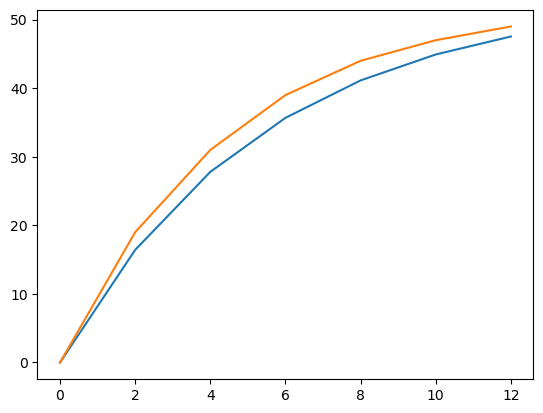

In [5]:
import matplotlib.pyplot as plt

import numpy as np

t=np.array([0,2,4,6,8,10,12])

g=9.81

m=68.1

c=12.5

v=skyfall(g,m,c,t)

u=skyfall_euler(g,m,c,t)

plt.plot(t,v,t,u)

<div style="text-align: justify">
Numeric function for assignment:
</div>

In [9]:
def Euler(m,c,g,t0,v0,tn,n):
    # print headings and initial conditions
    print('values of t approximations v(t)\n')
    print('{:8.3f} {:19.4f}\n'.format(t0,v0))
    # compute step size h
    h=(tn-t0)/n
    # set t,v to the initial values
    t=t0
    v=v0
    # compute v(t) over n time steps using Euler’s method
    for i in range(n):
        v=v+(g-c/m*v)*h
        t=t+h
        print('{:8.3f} {:19.4f}\n'.format(t,v))


<div style="text-align: justify">
The concepts of a function, the ability to write algebraic expressions
that get translated into machine language, and iteration are
fundamental to computer programming and today we take them for
granted. It is important to realize that when they were introduced
they were considered very advanced and radical ideas that were met
with resistance from the human programmers whose job was to do some of
these processes directly in machine language. ${\it Fortran}$ (an
acronym for Formula Translator) is considered the grand father of all
programming languages and was a language designed for scientific
computing and consequently numerical methods. A significant amount of still running code is
written in Fortran and several of the libraries that are used almost
everywhere for numerical methods are still only available in Fortran.
</div>

# Appendix
<div style="text-align: justify">
Some random bibliographical notes about Euler. He was born in
Switzerland in 1707 and lived throughout most of the 18th century. He
had remarkable memory and ability to compute intricate calculations
without the aid of pencil and paper. Like many good students of the
time he was destined for the ministry but "escaped" to mathematics. He
was tutored with a loose arrangement (meet every Saturday afternoon to
suggest readings and answer any questions) with the famous
mathematician of the time Johann Bernoulli. Contemporary of George
Washington, Captain Cook, Benjamin Franklin among others. At age 20,
he earned recognition in an international scientific competition for
his analysis of the placement of masts on a sailing ship. This was
remarkable for one so young and so landlocked (Switzerland). Was
married for four decades and had 13 children of which only five
survived to adolescence. He worked in St. Petersburg Academy and
although spent vast amounts of time to research he frequently found
himself as a scientific consultant to the government for example
preparing maps, advising the Russian navy and even testing fire engine
designs. He wrote Mechanica, which presented the Newtonian Laws of
motion within the framework of calculus which has been called "a
landmark in the history of physics". Deteriorating eyesight eventually
turned blind. Letters to a German Princess remains to this day one of
history's best examples of popular science. Frederik the great called
him "my cyclops" when he moved to Berlin. It is really fascinating to
read directly English translations of his texts and see how he laid
the foundations of many of the ideas and concepts we take today for
granted in engineering, physics and mathematics <sup>1</sup>.
    
$\rule{10cm}{0.2mm}$
    
$^1$http://www.17centurymaths.com
</div>